### 📚 구체적인 과제 수행 과정

#### 📖 지도학습 (supervised learning)

- 지도학습(supervised learning)은 머신러닝의 한 유형으로, 모델이 입력 데이터와 해당 타겟(레이블)을 사용하여 학습하는 방식이다. 
- 지도학습의 주요 목표는 입력 데이터와 타겟 변수 간의 관계를 학습하여 새로운 데이터에 대해 올바른 예측을 수행할 수 있도록 하는 것이다.
  
#### 지도학습의 주요 유형
- 회귀 (Regression) : 연속형 타겟 변수(값들이 연속적인 범위에서 아무 값이나 가질 수 있는 데이터)를 예측하는 문제이다. (예: 주택 가격 예측, 주식 가격 예측 등)
- 분류 (Classification): 이산형 타겟 변수(값이 연속적이지 않고, 특정한 유한한 집합에서만 사용하는 변수)를 예측하는 문제이다. (예: 이메일 스팸 분류, 이미지에서 개와 고양이 구분 등)

#### 지도학습의 과정
1. 데이터 준비: 입력 데이터와 타겟 변수로 구성된 데이터셋을 준비한다.
2. 모델 학습 (Training): 준비된 데이터셋을 사용하여 모델을 학습시킨다. 이 과정에서 모델은 입력 데이터와 타겟 변수 간의 관계를 학습한다.
3. 모델 예측 (Prediction): 학습된 모델을 사용하여 새로운 데이터에 대해 예측을 수행한다.
4. 모델 평가 (Evaluation): 예측 결과와 실제 타겟 변수를 비교하여 모델의 성능을 평가한다. 평가 지표로는 MSE(Mean Squared Error), 정확도(Accuracy) 등이 있다.


#### 1️⃣ 데이터셋 탐색

- pandas 라이브러리의 read 함수 사용하여 데이터 파일을 데이터프레임으로 불러오기

In [103]:
# 데이터 불러오기 (보스턴 주택 가격 데이터셋)
import pandas as pd

# csv 파일 불러오기 (./는 현재 디렉토리에 있는 파일을 가져오겠다는 뜻이다.)
df = pd.read_csv('./data/housingdata.csv')

# 전체 데이터프레임 확인
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [104]:
print('housingdata.csv 데이터 탐색')
print('-'*100)

# 데이터프레임의 정보 확인 (컬럼, 결측값, 데이터 타입 등)
df.info()
print('-'*100)

print(f'컬럼 : {list(df.columns)}')
print('-'*100)

print(f'데이터프레임의 크기 (행,열) : {df.shape}')
print('-'*100)

# 데이터프레임의 요약 통계량 확인
df.describe() 

housingdata.csv 데이터 탐색
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
----------------------------------------------------------------------------------------------------
컬럼 : ['CRI

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 💡 housingdata.csv 파일을 데이터프레임으로 만든 후 여러 메서드를 사용해 탐색한 결과

1. 506행, 14열의 데이터프레임이다.
2. 총 14개의 컬럼이 존재한다. ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
3. range index(연속 정수형 인덱스)가 총 506개, 즉, 0부터 505인덱스까지 있음을 알 수 있다.
4. 따라서, Non-Null Count가 506 non-null이 아닌 ['CRIM', 'ZN', 'INDUS', 'CHAS','AGE','LSTAT'] 컬럼은 결측값이 있는 것임을 알 수 있다. 
5. 'RAD', 'TAX'는 정수형, 그 외는 모두 실수형 데이터 타입이다.

#### 2️⃣ 데이터셋 전처리 (결측치 처리, 이상치 탐지 및 제거, 특징 선택)
##### 💡 전처리는 데이터 분석 및 머신러닝 모델링을 위해 데이터를 준비하는 과정으로, 데이터의 품질을 높이고 분석 결과의 신뢰성을 확보하기 위한 필수적인 과정 
##### 📝 결측치 처리 (데이터셋에서 누락된 값을 처리하는 작업) : 결측치를 처리하지 않으면 모델의 성능이 저하될 수 있다.

- 결측값이나 이상치는 데이터의 품질을 저하시킬 수 있다. 데이터 품질이 낮으면 모델의 성능이 떨어질 수 있고, 잘못된 예측을 할 가능성이 높아진다.
- 결측값이 포함된 데이터는 계산 과정에서 오류를 발생시킬 수 있으며, 이상치는 모델의 파라미터에 큰 영향을 미쳐 잘못된 학습 결과를 초래할 수 있다.
- 결측값과 이상치를 적절히 처리하면 모델의 일반화 능력과 예측 성능이 향상될 수 있다. 이는 모델이 새로운 데이터에 대해 더 나은 예측을 할 수 있게 해준다.

  - 제거 : 결측치가 있는 행이나 열을 제거한다. 정확한 데이터만 가질 수 있어 결측치가 적을 때는 유용하지만, **데이터 손실**이 발생할 수 있다.
  - 대체 : 평균, 중앙값, 최빈값 등으로 결측치를 대체한다.
  - 예측 : 다른 특성을 사용하여 결측치를 예측하고 채운다.


➡️ 해당 데이터의 특성에 맞게 결측치를 처리해야 한다. **다양한 방법을 시도**해보고 가장 적합한 방법을 선택하는 것이 중요하다.

##### 📝 현재 결측치가 있는 컬럼들

- **CRIM**: 마을별 1인당 범죄율 [mean : 3.611874 / min : 0.006320 / max : 88.976200]
    - 최댓값이 크긴하지만 평균값을 봤을 때 대체로 작은 값에 몰려있는 것 같아, 평균값으로 대체해주겠다.
- **ZN**: 25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율 [mean : 11.211934 / min : 0.000000 / max : 100.000000]
    - 데이터를 봤을 때 0이 이어지다가 어디는 수치가 몰려있는, 군집화된 양상을 띄고 있다. 비어있는 결측값에 아무거나 넣어놓으면 군집화가 깨질 수도 있을 것 같아, 결측값이 있는 행은 제거하겠다.
- **INDUS**: 마을별 비소매업무 지역 비율 [mean : 11.083992 / min : 0.460000 / max : 27.740000]
    - 값이 최솟값부터 최댓값까지 고루 분포하는 양상을 보여서, 평균값으로 대체해주겠다.
- **CHAS**: 찰스 강 더미 변수 (강이 인접한 경우 1, 그렇지 않으면 0) [mean : 0.069959 / min : 0.000000 / max : 1.000000]
    - 더미형 데이터의 경우 결측값은 날려버리는 것도 괜찮다고 해서 결측값이 있는 행을 제거하겠다. 
- **AGE**: 1940년 이전에 지어진 소유주 점유 비율 [mean : 68.518519 / min : 2.900000 / max : 100.000000]
    - 값이 고루 분포하는 양상을 보여서, 평균값으로 대체해주겠다. 
- **LSTAT**: 인구 중 저소득층 비율 [mean : 12.715432 / min : 1.730000 / max : 37.970000]
    - 값이 고루 분포하는 양상을 보여서, 평균값으로 대체해주겠다.

✏️ 결측값을 모조리 제거하고 학습한 모델, 결측값을 모조리 평균값으로 대체한 모델, 선형회귀모델을 통해 결측값을 예측해서 채워준 모델보다, 위에 적어놓은 것대로 결측값을 적당히 처리하고 학습한 모델의 성능이 더 좋았다.

In [105]:
# 데이터셋의 결측값을 다른 값으로 대체하기
# inplace = True 옵션으로 원본데이터 변경

df['CRIM'].fillna(df['CRIM'].mean(), inplace=True) # 평균값
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True) # 평균값
df['AGE'].fillna(df['AGE'].mean(), inplace=True) # 평균값
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True) # 평균값

# 그 외 결측값이 있는 행은 제거하기
df.dropna(inplace=True)

print('각 컬럼들의 결측값 현황')
print(df.isna().sum())  # 결측값이 잘 처리되었는지 확인 (결측값을 대체하거나 결측값이 있는 행을 제거해서 각 컬럼의 결측값이 0인 것을 알 수 있다.)
print('-'*100)
df.info() # 데이터프레임 정보 다시 확인 (총 506행의 데이터에서 466행의 결측값 없는 데이터로 바뀐 것을 확인 가능) (❗️ 결측값이 있는 행을 제거했을 뿐 인덱스는 기존과 같다는 점 유의)

각 컬럼들의 결측값 현황
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     466 non-null    float64
 1   ZN       466 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     466 non-null    float64
 4   NOX      466 non-null    float64
 5   RM       466 non-null    float64
 6   AGE      466 non-null    float64
 7   DIS      466 non-null    float64
 8   RAD      466 non-null    int64  
 9   TAX      466 non-null    int64  
 10  PTRATIO  466 non-null    float64
 11  B        466 non-null    float64
 12  LSTAT    466 non-null    float64
 13  MEDV     466 no

---

##### 📝 이상치(데이터에서 비정상적으로 크거나 작은 값) 탐지 및 제거 : 이상치는 분석결과에 큰 영향을 미쳐 모델의 성능을 저하시킬 수 있다.
- 제거 : 이상치를 데이터셋에서 제거한다.
- 대체 : 이상치를 특정 값으로 대체한다. 
- 변환 : 이상치를 변환하여 데이터의 분포를 조정한다. (예: 상한선이나 하한선으로 대체)
- IQR 방법 : IQR(interquartile Range : 사분위 범위)을 사용하여 이상치를 탐지하고 처리한다. (**정수형 및 실수형 데이터**)
    - IQR 방법은 데이터의 범위와 분포를 이해하고 이상값(outliers)을 탐지하는 데 사용되는 통계적 기법이다. IQR은 데이터셋에서 상위 25%를 제거한 중간 50%의 범위를 나타낸다. 이는 데이터의 중간값 주변의 분포를 분석할 때 유용하다.
    - 백분위수 : 데이터를 백분위수로 나누었을 때의 값을 나타내는 통계적 척도. 백분위수는 데이터를 100개의 동일한 부분으로 나누는 방식으로, 특정 백분위수는 전체 데이터의 몇 퍼센트가 해당 값 이하인지를 나타낸다. 
    - 백분위수는 데이터의 분포를 이해하고 데이터 간의 상대적 위치를 파악하는 데 유용하게 사용된다.
        - 0 백분위수 : 최솟값
        - 25 백분위수 : 1사분위수(Q1), 전체 데이터의 하위 25%가 이 값 이하
        - 50 백분위수 : 중앙값(median), 전체 데이터의 하위 50%가 이 값 이하
        - 75 백분위수 : 3사분위수(Q3), 전체 데이터의 하위 75%가 이 값 이하
        - 100 백분위수 : 최댓값
        - IQR : Q3 - Q1, 즉 3사분위수에서 1사분위수를 뺀 값이다.
    - IQR 방법을 사용한 이상값 탐지 : 이상값은 일반적으로 다음 범위를 벗어난 값으로 정의된다.
        - 하한값(lower_bound) : Q1 - 1.5 * IQR
        - 상한값(upper_bound) : Q3 + 1.5 * IQR

In [106]:
#  IQR 방법을 활용한 각 컬럼의 이상치 확인

# 특정 열의 이상치 확인 (IQR 방법)
# 데이터프레임의 quantile 메서드는 특정 백분위수(quantile)에 해당하는 값을 셰산하는 데 사용된다. 주어진 백분위수를 기준으로 데이터를 나눠주는 값을 반환한다.
Q1 = df['CRIM'].quantile(0.25)
Q3 = df['CRIM'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR # 하한값
upper_bound = Q3 + 1.5 * IQR # 상한값

# 해당 컬럼에서 이상치가 있는 행 확인해보기 (하한값보다 작거나 상한값보다 큰 값은 이상치로 간주한다.)
outliers = df[(df['CRIM'] < lower_bound) | (df['CRIM'] > upper_bound)]

print(outliers.head()) # CRIM 컬럼에서 이상치로 간주되는 데이터 포인트들을 보여준다. (5개만 보겠음)

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
356   8.98296  0.0   18.1   1.0  0.770  6.212   97.4  2.1222   24  666   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691   24  666   
373  11.10810  0.0   18.1   0.0  0.668  4.906  100.0  1.1742   24  666   
374  18.49820  0.0   18.1   0.0  0.668  4.138  100.0  1.1370   24  666   
377   9.82349  0.0   18.1   0.0  0.671  6.794   98.8  1.3580   24  666   

     PTRATIO       B  LSTAT  MEDV  
356     20.2  377.73  17.60  17.8  
371     20.2  366.15   9.53  50.0  
373     20.2  396.90  34.77  13.8  
374     20.2  396.90  37.97  13.8  
377     20.2  396.90  21.24  13.3  


In [107]:
# 이상치 처리 (평균값으로 대체) 맛보기용
mean_value = df['CRIM'].mean()

# 해당 열 전체의 각 데이터 포인터를 검사하여 이상치인 경우 평균값으로 대체하고, 그렇지 않은 경우 원래 값을 유지
df['CRIM'] = df['CRIM'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

outliers = df[(df['CRIM'] < lower_bound) | (df['CRIM'] > upper_bound)]
print(outliers) # 이상치 처리가 됐는지 확인해보자

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


이상치를 담아야 할 데이터프레임 outliers가 비어있는 것을 알 수 있다.

이제 이 과정을 나머지 모든 컬럼에 반복해주면 데이터셋 전체의 이상치 처리가 완료된다.

In [108]:
# 해당 과정을 나머지 모든 컬럼에 반복

columns = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

for column in columns:
    Q1 = df[column].quantile(0.25) # 1사분위
    Q3 = df[column].quantile(0.75) # 3사분위
    IQR = Q3 - Q1 # IQR
    
    # 이상치 탐지 범위 설정
    lower_bound = Q1 - 1.5 * IQR # 하한값
    upper_bound = Q3 + 1.5 * IQR # 상한값

    # 컬럼의 평균값 계산
    mean_value = df[column].mean()
    
    # 이상치를 평균값으로 대체
    df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

이제 결측값과 이상치를 처리했으니 머신러닝 모델을 위한 특징(feature)을 선택하자!

#### 📝 특징 선택(Feature Selection) 및 추출(Feature Extraction)

- 머신러닝 모델 성능을 높이기 위해 중요한 특징을 선택하거나 새로운 특징을 추출하는 과정. 
- **특징 선택 과정을 통해 모델 학습에 가장 유용한 특징들을 선별하고, 이들만을 포함하는 새로운 입력 데이터를 만들어 모델을 학습시키는 것**이다. 
- 한 마디로, 특징을 선택한다는 것은 **기존 입력 데이터에서, 모델 학습에 가장 유용한 특정한 특징(컬럼)들을 선택하여 이들만을 포함하는 새로운 입력 데이터를 만든다**는 것이다. 
- 이런 접근법은 모델의 성능을 최적화하고 불필요한 특징을 제거하여 계산 비용을 줄여줄 수 있다.

다음은 scikit-learn 라이브러리의 SelectKBest 클래스를 사용하여 상위 5개의 중요한 특징을 선택하는 과정이다.

#### **SelectKBest 클래스**

- scikit-learn 라이브러리의 SelectKBest 클래스는 가장 좋은 K개의 특징을 선택하는 데 사용된다.
- 여기서 '가장 좋은'을 결정하는 기준은 특징 선택 방법에 따라 달라지는데, 여러 가지 방법이 있지만 SelectKBest와 f_classif를 사용하는 경우 '가장 좋은' 특징을 결정하는 기준은 ANOVA F-검정(Analysis of Variance F-test)을 기반으로 한다.

#### **ANOVA F-검정**

- 목적: **각 특징이 타겟 변수와 얼마나 강한 상관관계를 가지는지** 평가한다.
- F-통계량: **각 특징의 설명력이 타겟 변수에 얼마나 기여하는지**를 나타내는 통계량이다.
    - 높은 F-통계량: 해당 특징이 타겟 변수와 강한 상관관계를 가지며, '좋은' 특징으로 간주된다.

- 특징 선택 과정
    - 특징 평가: 각 특징에 대해 ANOVA F-검정을 수행하여 F-통계량을 계산한다.
    - 순위 매기기: F-통계량에 따라 특징을 내림차순으로 정렬한다.
    - 특징 선택: 가장 높은 F-통계량을 가진 상위 K개의 특징을 선택한다. 
  
#### **f_classif**

- 바로 위에서 설명한 분산분석(ANOVA) F-검정을 수행하는 함수로, **각 특징의 중요도를 평가**한다.
- 분류 문제에서 자주 사용된다.

In [109]:
# 모델의 학습에 중요한 특징을 선택하는 과정

from sklearn.feature_selection import SelectKBest,f_classif

# 예시로 'MEDV'(데이터셋에서 주택 가격의 중간값을 나타내는 컬럼)를 타겟 변수로 설정. 'MEDV'는 예측하고자 하는 타겟 변수이기 때문에 입력 데이터에서 제외해야 한다.(정답지 주고 학습시키면 안됨!)

# X : 입력 데이터. 모델이 학습하는데 사용하는 특징(features)들을 (현재는 모두)담고 있는 데이터프레임. 학습을 통해 예측해야 하는 타겟변수인 'MEDV'를 제외시킨 모든 열이 포함된 데이터프레임이다.
X = df.drop(columns=['MEDV']) 

# y : 예측해야 하는 목표값을 담고 있는 시리즈
y = df['MEDV'] # 데이터셋에서 MEDV 열을 선택하여 타겟변수 y로 설정한다.

# SelectKBest 객체 생성(score_func는 각 특징(특성)의 중요도를 평가할 함수로, 여기서는 f_classif를 지정해줬다. k 옵션을 통해 상위 k개의 특징을 선택한다.)
# 여기서 selector는 상위 k개의 특징을 선택할 수 있도록 하는 메커니즘을 설정하는 객체이다.
selector = SelectKBest(score_func=f_classif, k=5) 

# fit_transform 메서드는 Scikit-learn과 같은 머신러닝 라이브러리에서 데이터 전처리와 특징 선택과 같은 작업을 수행한다.
# 상위 k개의 특징을 선택할 수 있도록 하는 메커니즘인 selector 객체에 fit_transform 메서드를 사용하여 입력 데이터 X와 타겟변수 y에 맞춰서 학습(fit)하고(학습한 다음에 상관성 높은 상위 k개의 특징을 뽑는 것), 상위 5개의 중요한 특징들을 선택하여 넘파이 배열로 변환(transform)한다.
# 결과적으로 선택된 상위 5개의 특징(컬럼)만 포함된 새로운 데이터 X_new 가 생성된다.

# 먼저 데이터에 맞추어 모델이나 변환기를 학습(fit)한다. 이 과정에서는 모델이 데이터의 구조나 분포를 학습하게 된다.
# 학습된 모델이나 변환기를 사용하여 데이터를 넘파이 배열로 변환(transform)한다. 이 과정에서는 학습된 정보를 바탕으로 데이터를 실제로 변환하여 새로운 형식(여기서는 k개의 열이 담긴 넘파이 배열)으로 반환한다.
X_new = selector.fit_transform(X, y) 


# 어떤 특징(컬럼)이 선택되었는지 확인하기

# get_support 메서드는 sklearn의 특징 선택 클래스에서 사용되며, '선택된 특징의 인덱스를 반환'한다.
# indices=True 옵션은 메서드가, 선택된 특징의 인덱스를 반환하도록 지정한다. 선택된 특징의 인덱스는 해당 특징이 입력 데이터에서 몇 번째 '열'에 위치해 있는지를 나타낸다.
selected_features = selector.get_support(indices=True) 
print("선택된 특징의 인덱스:", selected_features) 
print("선택된 특징:", X.columns[selected_features]) # 기존의 X 데이터에서 선택된 상위 5개의 특징 컬럼을 보여줌 (특징 컬럼이 몇 번째 열에 위치해있는지를 반환하는 인덱스라고 했잖음)

선택된 특징의 인덱스: [ 2  4  5  9 12]
선택된 특징: Index(['INDUS', 'NOX', 'RM', 'TAX', 'LSTAT'], dtype='object')


⭐️ X_new는 SelectKBest를 사용하여 기존의 입력 데이터 X에서, 중요한 상위 K개의 특징만을 포함하는 새로운 입력 데이터를 만든 것이다! ⭐️

X_new에는 선택된 상위 K개의 특징(컬럼)만 포함되어 있고, 나머지 특징들은 모두 제거된 상태다.

코드 요약
- 기존의 입력 데이터 X : 원래의 모든 특징(컬럼)을 포함한 데이터프레임.
- 새로운 입력 데이터 X_new : SelectKBest에 의해 선택된 중요한 상위 K개의 특징(컬럼)만을 포함한 넘파이 배열(array). X_new는 X와는 달리 선택된 k개의 열만을 갖게 된다.

X_new는 fit_transform 메서드의 결과로 생성된 NumPy 배열(array)이다. 이는 모델 학습과 같은 머신러닝 작업에 최적화된 형식이다.

- NumPy 배열은 성능이 뛰어나고, 다차원 배열 연산을 쉽게 수행할 수 있기 때문에 머신러닝 모델 학습에 매우 적합하다.

In [110]:
# 새로운 입력 데이터 X_new 확인
X_new

array([[  2.31 ,   0.538,   6.575, 296.   ,   4.98 ],
       [  7.07 ,   0.469,   6.421, 242.   ,   9.14 ],
       [  7.07 ,   0.469,   7.185, 242.   ,   4.03 ],
       ...,
       [ 11.93 ,   0.573,   6.976, 273.   ,   5.64 ],
       [ 11.93 ,   0.573,   6.794, 273.   ,   6.48 ],
       [ 11.93 ,   0.573,   6.03 , 273.   ,   7.88 ]])

In [111]:
print(X_new.shape) # 여전히 466행이고, 상위 5개 특징 열만 뽑아서 5열인 배열임을 알 수 있다.

(466, 5)


In [112]:
# 배열을 데이터프레임으로 바꿔서 확인해보자
X_new_df = pd.DataFrame(X_new, columns=X.columns[selected_features]) 
print("X_new를 데이터프레임으로 바꿔준 것)")
print(X_new_df)

X_new를 데이터프레임으로 바꿔준 것)
     INDUS    NOX     RM    TAX      LSTAT
0     2.31  0.538  6.575  296.0   4.980000
1     7.07  0.469  6.421  242.0   9.140000
2     7.07  0.469  7.185  242.0   4.030000
3     2.18  0.458  6.998  222.0   2.940000
4     2.18  0.458  7.147  222.0  12.715432
..     ...    ...    ...    ...        ...
461  11.93  0.573  6.593  273.0  12.715432
462  11.93  0.573  6.120  273.0   9.080000
463  11.93  0.573  6.976  273.0   5.640000
464  11.93  0.573  6.794  273.0   6.480000
465  11.93  0.573  6.030  273.0   7.880000

[466 rows x 5 columns]


이제 특징 선택이 완료된 새로운 입력데이터 X_new까지 구해놨으니, 모델을 만들어보자 !

In [113]:
# 데이터 분할 (머신러닝 모델을 학습시키기 전에 데이터를 훈련데이터와 테스트 데이터로 나누는 중요한 과정)
# train_test_split 함수를 사용하여 데이터를 훈련 데이터와 테스트 데이터로 나눈다.

from sklearn.model_selection import train_test_split

# 데이터 분할 (80% 훈련 데이터, 20% 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (모델 학습을 돕기 위해 모든 특징을 일정한 범위로 변환하는 것)
# StandardScaler는 각 특징을 평균이 0이고, 분산이 1이 되도록 표준화하여 모델이 특정 특징에 대해 과도하게 민감하게 반응하는 것을 방지한다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 훈련데이터 스케일링 : fit_transform 메서드는 훈련 데이터 X_train 데이터를 평균이 0, 분산이 1이 되도록 변환해준다.
X_train = scaler.fit_transform(X_train)

# 테스트 데이터 스케일링 : transform 메서드는 훈련 데이터에서 계산된 평균과 표준편차를 사용하여 테스트 데이터 X_test를 표준화한다.
X_test = scaler.transform(X_test)

코드 설명

train_test_split(X_new, y, test_size=0.2, random_state=42)
- X_new: 선택된 상위 5개의 특징(컬럼)을 포함하는 입력 데이터
- y: 타겟 변수 (예: 주택 가격)
- test_size = 0.2: 전체 데이터의 20%를 테스트 데이터로 사용하겠다.
- random_state=42: 결과를 재현 가능하게 하는 임의의 시드 값이다. (다시 돌렸을 때도 같은 결과가 나오게 하기 위함)

반환값
- X_train: 훈련 데이터의 입력 변수 (80%) 
- X_test: 테스트 데이터의 입력 변수 (20%)
- y_train: 훈련 데이터의 타겟 변수 (80%)
- y_test: 테스트 데이터의 타겟 변수 (20%)
- 훈련용 X 데이터랑 훈련용 y 데이터로 모델을 학습시키고, 이후에 테스트용 X를 입력 데이터로 줘서 테스트용 y(정답)가 나오는지 확인하는 것이다. 이걸 잘 하면 모델의 성능이 좋은 것! 

#### 🤖 선형회귀 모델
- 선형회귀는 종속 변수와 하나 이상의 독립변수 간의 선형관계를 모델링하는 방법이다.
- 단순선형회귀 : 하나의 독립변수와 하나의 종속변수 간의 관계를 모델링
- 다중선형회귀 : 여러 독립변수와 하나의 종속 변수 간의 관계를 모델링
- 용례 : 연속형 변수 예측(주택가격, 온도 등), 시간 시계열 예측(다음 달의 판매량), 데이터 전처리

In [114]:
# LinearRegression 클래스는 선형회귀 모델을 만든다.
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 초기화 및 학습
# model 객체는 선형회귀 모델을 나타낸다.
model = LinearRegression()

# fit 메서드를 사용하여 모델을 학습시킨다.
# 모델이 X_train과 y_train을 사용하여 패턴을 학습한다.
model.fit(X_train, y_train)

LinearRegression()

fit 메서드는 머신러닝 모델을 학습시키는 데 사용되는 중요한 함수이다. 

fit 메서드는 주어진 데이터에 모델을 맞추는 과정, 즉 학습하는 과정을 수행한다. 

- 모델 학습: 주어진 입력 데이터(X)와 타겟 변수(y)를 사용하여 모델의 내부 파라미터를 학습한다. 모델은 이 데이터를 통해 패턴을 인식하고, 이후 예측을 위한 준비를 마친다.
- 데이터 적합화: 데이터의 특성과 구조를 학습하여 모델이 최적의 예측을 할 수 있도록 한다.

In [115]:
# 테스트 데이터를 사용하여 모델 평가
# 평가 지표를 사용하기 위해 sklearn.metrics 모듈에서 mean_squared_error와 r2_score 함수를 임포트한다.
# mean_squared_error 함수: 평균 제곱 오차(MSE)를 계산하여 반환.
# r2_score : 결정 계수(R^2 점수)를 계산하여 반환.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 예측값 생성
# 모델에 훈련데이터를 fit(학습)시켰으니 이제 predict 메서드를 사용하여 테스트 데이터를 받아 예측값을 생성하자. (훈련용으로 안쓰고 남은 X 데이터 남아있었음)
y_pred = model.predict(X_test)
# y_pred: 예측된 타겟 변수

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred) # 예측값과 실제값 간의 평균 절대 오차를 나타낸다.(0에 가까울수록 좋음)
mse = mean_squared_error(y_test, y_pred) # 예측값과 실제값 간의 차이의 제곱 평균(0에 가까울수록 좋음)
r2 = r2_score(y_test, y_pred) # 모델의 설명력을 나타내는 지표. 얼마나 오차가 일정한가. (값이 1에 가까울수록 좋음)

print(f"mean_absolute_error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

mean_absolute_error: 2.455045106800746
Mean Squared Error: 9.709087415273196
R^2 Score: 0.7264160944964467


#### 🤖 의사결정나무 모델
- 지도학습의 분류모델 중 의사결정나무(Decision Tree)란, 예측 모델 중 하나로, 데이터의 특징(feature)을 기준으로 의사결정 규칙을 만들고 이를 바탕으로 데이터를 분류하거나 회귀(입력데이터에 대한 타겟변수를 예측하는 것)하는데 사용한다. 
- 의사결정나무는 트리구조를 가지며, 각 내부 노드는 데이터의 특정 특징에 대한 테스트를 나타내고, 각 가지(branch)는 테스트 결과를 나타내며, 각 리프 노드(leaf)는 클래스 레이블을 나타낸다.
    - 노드 : 트리의 각 분기점으로, 하나의 특징에 대한 테스트를 나타낸다. 
    - 루트 노드: 트리의 최상위 노드로, 전체 데이터셋을 나타낸다.
    - 리프 노드: 트리의 끝 노드로, 최종 클래스 레이블을 나타낸다.
    - 깊이: 트리의 루트 노드부터 리프 노드까지의 최대 거리이다.
    - 분할 기준: 노드를 나눌 때 사용하는 기준.
        - 정보 이득(Information Gain) : 엔트로피 값으로 데이터를 나누는 기준이다. 엔트로피는 불확실성을 나타내며, 엔트로피가 낮을수록 불확실성이 적다.
        - 지니 계수(Gini Index) : 불순도를 측정하는 방법으로, 지니계수가 낮을수록 불순도가 적다.

➡️ 강의에서 분류모델 의사결정나무 알려줘서 그걸로 했더니, 분류모델(DecisionTreeClassifier)을 연속값(회귀목표)으로 학습시키려고 했다는 오류가 발생했다. 분류모델은 이산형 클래스(범주형 데이터)를 예측하는 데 사용되며, 연속형 데이터(실제 숫자 값)를 예측할 수 없다고 한다.

➡️ 따라서 회귀모델의 의사결정나무 모델을 사용하겠다. (DecisionTreeRegressor)

In [116]:

from sklearn.tree import DecisionTreeRegressor

# 의사결정나무 모델 생성 및 학습
tr_model = DecisionTreeRegressor(random_state=42)
tr_model.fit(X_train, y_train)

# 예측값 생성
y_pred_tr = tr_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error,r2_score

mse_tr = mean_squared_error(y_test, y_pred_tr)
r2_tr = r2_score(y_test, y_pred_tr)

print(f'의사결정나무 모델의 MSE: {mse_tr}')
print(f"의사결정나무 모델의 R^2 Score: {r2_tr}")

의사결정나무 모델의 MSE: 18.800077963366277
의사결정나무 모델의 R^2 Score: 0.47024900147690063


#### 앙상블 학습

- 앙상블 학습(Ensemble Learning)은 **여러 개의 학습 모델을 결합하여 하나의 강력한 모델을 만드는 기법**이다.
- 앙상블 학습은 **개별 모델의 예측을 결합함으로써, 단일 모델보다 더 높은 예측 성능과 일반화 능력**을 얻을 수 있다.
- 앙상블 학습의 주요 기법으로는 배깅(Bagging)과 부스팅(Boosting)이 있다.
- 배깅(Bootstrap Aggregating) : 다수결 원리
    - 배깅은 여러 개의 학습 모델을 병렬로 학습시키고, 그 예측 결과를 평균 또는 다수결로 결합하는 앙상블 기법이다. 여러 모델의 예측을 결합함으로써 과적합을 줄일 수 있다.
    - 데이터의 샘플링 과정에서 부트 스트래핑 기법을 사용하여, 원본 데이터셋에서 중복을 허용한 무작위 샘플을 생성한다. 
    - 각 모델은 서로 다른 데이터 샘플을 학습하게 되어, 모델 간의 상관성을 줄이고 예측 성능을 향상시킨다.  
- 부스팅(Boosting) : 약한 학습기를 결합한 강한 학습기
    - 부스팅은 여러 개의 약한 학습기를 순차적으로 학습시키고, 그 예측 결과를 결합하여 강한 학습기를 만드는 앙상블 기법이다. 약한 학습기를 결합하여 높은 예측 성능을 얻을 수 있다.
    - 부스팅은 이전 모델이 잘못 예측한 데이터 포인트에 가중치를 부여하여, 다음 모델이 이를 더 잘 학습하도록 한다. 이전 모델의 오류를 보완하는 방식으로 학습이 진행된다.

#### 🤖 배깅 모델 : 다수결 원리

- estimator 옵션 : 배깅에 사용할 기본 학습기의 유형을 지정한다. 예를 들어, estimator=DecisionTreeRegressor() 는 각 기본 학습기로 의사결정나무 회귀모델을 사용한다는 의미이다. 이것은 배깅과정에서 각 기본학습기가 어떤 알고리즘을 사용할지를 결정한다.
- n_estimators 옵션 : 앙상블 기법에서, 여러 번의 반복 학습을 통해 생성되는 기본 학습기의 개수를 지정한다
- 이는 모델의 다양성을 높이고 예측 성능을 향상시키는데 중요한 역할을 한다. 지정한 숫자만큼의 기본학습기를 생성하고, 각각의 학습기는 서로 다른 데이터 샘플에 대해 학습되며, 서로 다른 예측을 제공한다. 이렇게 모든 기본학습기의 예측을 결합하여 최종 예측을 만든다. 회귀 문제의 경우 평균값을 사용하고, 분류 문제의 경우 다수결 투표를 사용한다. 여러 모델의 예측을 결합함으로써 각 모델의 오류가 상쇄되어 최종 예측의 정확도를 높이는 데 도움을 준다.

💡 n_estimators: "100명의 화가가 있다"고 생각할 수 있다. 여기서 100은 n_estimators로, 여러 개의 개별 학습기(화가)를 의미한다.

💡 estimator: "이 화가들은 모두 같은 종류의 브러쉬를 사용해 그림을 그린다"고 생각할 수 있다. 여기서 estimator는 학습기가 어떤 유형의 모델(브러쉬)을 사용할지를 결정한다.

위를 종합하면, 
배깅 모델에서 n_estimators=100은 무작위로 100개의 다른 머신러닝 모델을 가져오는 것이 아니라, estimator 옵션에서 지정한 동일한 모델을 100개 생성하는 것이다.

bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42) 

위 코드는 100개의 DecisionTreeRegressor 모델을 사용하여 각자 원본데이터에서 무작위로 샘플링된 다른 데이터를 학습하여 예측하고 최종적으로 이들을 결합하여 최종 예측을 생성하는 배깅 모델을 생성하는 코드인 것이다!
이 방법을 통해 단일 모델보다 더 안정적이고 강력한 예측 성능을 제공한다.

In [117]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# 배깅 모델 생성 (estimator : 머신러닝 모델)
# estimator: 개별 기본 학습기로 사용할 모델을 지정. 여기서는 DecisionTreeRegressor를 사용함
# n_estimators: 생성할 기본 학습기의 개수. 여기서는 100개의 의사결정 나무를 생성하겠다는 뜻
# random_state: 랜덤 시드 값으로, 결과의 재현성을 보장하기 위함
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# 모델 학습
bagging_model.fit(X_train, y_train)

# 예측
y_pred_bagging = bagging_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error,r2_score

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f'배깅 모델의 MSE: {mse_bagging}')
print(f"배깅 모델의 R^2 Score: {r2_bagging}")

배깅 모델의 MSE: 8.909975885558874
배깅 모델의 R^2 Score: 0.7489335612655943


#### 🤖 랜덤 포레스트
- 랜덤 포레스트는 **배깅 기법을 기반으로** 하지만, **추가적인 무작위성을 도입하여 모델의 다양성을 증가시키고 예측 성능을 향상시킨 앙상블 학습 모델**이다.
- 배깅에서는 여러 모델을 기본 학습기로 사용할 수 있었지만, 랜덤 포레스트는 **항상 의사결정나무를 기본 학습기로 사용**한다. 
- 배깅은 데이터 샘플링만 무작위였다면, 랜덤 포레스트는 데이터 샘플링과 특징선택 둘 다 무작위이다. 
- 배깅은 모든 특징을 사용하여 학습한다면, 랜덤 포레스트는 **각 분할에서 무작위로 선택된 하위 집합의 특징만 사용하여 학습**한다. 
- 이렇게 여러 개의 의사결정나무를 학습시키고, 그 예측 결과를 결합하여 최종예측을 수행한다.
- 각 트리가 독립적으로 학습되기 때문에, 과적합을 방지하고 예측 성능을 향상시킬 수 있다.
  
##### 랜덤 포레스트의 구조
- 랜덤 포레스트는 여러 개의 결정 트리로 구성된다.
- 각 결정 트리는 데이터의 무작위 샘풀을 사용하여 학습되며, 트리의 예측 결과를 평균 또는 다수결로 결합하여 최종 예측을 수행한다.
- 랜덤 포레스트는 두 가지 무작위성을 도입하여 모델의 다양성을 증가시키고 과적합을 방지한다.
    - 데이터 샘플링의 무작위성 : 각 결정 트리는 원본 데이터셋에서 무작위로 샘플링된 데이터로 학습된다.
    - 특성 선택의 무작위성 : 각 노드에서 분할을 수행할 때, 무작위로 선택된 특성의 일부만을 사용한다.

In [118]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error,r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')
print(f"렌덤 포레스트 모델의 R^2 Score: {r2_rf}")

랜덤 포레스트 모델의 MSE: 8.771439929071077
렌덤 포레스트 모델의 R^2 Score: 0.7528372451451915


#### 🤖 그래디언트 부스팅 머신 모델 (부스팅 모델)

- 그래디언트 부스팅 머신(Gradient Boosting Machine, GBM)은 **여러 개의 약한 학습기를 순차적으로 학습시키고, 그 예측 결과를 결합하여 강한 학습기를 만드는 앙상블 기법**이다. 
- GBM은 이전 모델이 잘못 예측한 데이터 포인트에 가중치를 부여하여 다음 모델이 이를 더 잘 학습하도록 한다.
- 각 트리가 독립적으로 학습되기 때문에 과적합을 방지하고 예측 성능을 향상시킬 수 있다.

##### GBM의 구조
- GBM은 여러 개의 결정 트리(Decision Tree)로 구성된다.
- 각 결정 트리는 이전 트리의 예측 오류를 보완하는 방식으로 학습된다. (주로 의사결정 나무를 약한 학습기로 사용하지만, 다른 모델도 부스팅 모델에 사용할 수 있다.)
- GBM은 각 트리의 예측 결과를 **가중합**하여 최종 예측을 수행한다.

##### GBM의 원리
1. **초기 모델 학습**: 첫 번째 결정 트리를 학습시켜 초기 모델을 만든다.
2. **잔여 오차 계산**: 초기 모델의 예측 결과와 실제 값 간의 잔여 오차를 계산한다.
3. **잔여 오차 학습**: 잔여 오차를 예측하는 새로운 결정 트리를 학습시킨다.
4. **모델 업데이트**: 새로운 결정 트리를 기존 모델에 추가하여 모델을 업데이트한다.
5. **반복**: 잔여 오차가 충분히 작아질 때까지 2~4 단계를 반복한다. 각 단계에서 학습된 모델은 이전 모델의 잔여 오차를 줄이는 데 집중한다.

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# GBM 모델 생성
# learning_rate : 각 학습 단계에서 모델의 예측을 조정하는 정도를 조절하는 학습률
# max_depth : 각 의사결정 나무의 최대 깊이를 조절한다.
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
gbm_model.fit(X_train, y_train)

# 예측
y_pred_gbm = gbm_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error,r2_score

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'GBM 모델의 MSE: {mse_gbm}')
print(f"GBM 모델의 R^2 Score: {r2_gbm}")

GBM 모델의 MSE: 7.810404459963951
GBM 모델의 R^2 Score: 0.7799174253640003


#### 🤖 XGBoost

- XGBoost(eXtreme Gradient Boosting)는 **그래디언트 부스팅 알고리즘을 기반으로 한 고성능 앙상블 학습 기법**이다.
- XGBoost는 효율성, 유연성, 이식성을 목표로 설계되었으며, 다양한 머신러닝 경진대회에서 우수한 성능을 보여주고 있다.
- 병렬 처리, 조기 종료, 정규화 등의 기능을 통해 성능을 극대화한다.

#### XGBoost의 구조
- XGBoost는 여러 개의 결정 트리(Decision Tree)로 구성된다.
- 각 결정 트리는 이전 트리의 예측 오류를 보완하는 방식으로 학습된다.
- XGBoost는 각 트리의 예측 결과를 가중합하여 최종 예측을 수행한다.

#### XGBoost의 원리
1. **초기 모델 학습**: 첫 번째 결정 트리를 학습시켜 초기 모델을 만든다.
2. **잔여 오차 계산**: 초기 모델의 예측 결과와 실제 값 간의 잔여 오차를 계산한다.
3. **잔여 오차 학습**: 잔여 오차를 예측하는 새로운 결정 트리를 학습시킨다.
4. **모델 업데이트**: 새로운 결정 트리를 기존 모델에 추가하여 모델을 업데이트한다.
5. **반복**: 잔여 오차가 충분히 작아질 때까지 2~4 단계를 반복한다.

GBM을 기반으로 해서 둘이 크게 다르지 않아보인다.


#### XGBoost의 특징

- **병렬 처리**: 트리의 분할을 **병렬로 수행하여 학습 속도를 향상**시킨다.
- **조기 종료**: 검증 데이터셋의 성능이 향상되지 않으면 학습을 조기에 종료하여 과적합을 방지한다.
- **정규화**: L1 및 L2 정규화를 통해 모델의 복잡도를 조절하고 과적합을 방지한다.
- **유연성**: 다양한 손실 함수와 평가 지표를 지원하여 다양한 문제에 적용할 수 있다.

##### ⭐️ XGBoost가 이중에서는 가장 성능 좋은 모델이라고 했다! 그러니 한번 하이퍼파라미터를 최적화하는 과정까지 추가해보겠다.

하이퍼파라미터란 머신러닝 모델의 학습과정에 영향을 미치는 설정값들이다. 이들은 모델의 성능과 예측력에 큰 영향을 미칠 수 있으며, 학습 전에 설정되어야 하는 값들이다. 즉, 하이퍼파라미터는 모델을 구축하는 데 있어 중요한 역할을 하며, 데이터에 대한 최적의 성능을 도출하는 데 필요하다.

하이퍼파라미터 최적화란, 모델의 성능을 극대화하기 위해 다양한 하이퍼파라미터 설정을 탐색하는 과정이다. 

Grid Search와 Random Search 기법을 통해 최적의 하이퍼파라미터를 찾을 수 있다.

In [120]:
# Grid Search를 사용하여 하이퍼파라미터 최적화

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1]
}

# Grid Search 설정
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Grid Search 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 확인
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_}')  # neg_mean_squared_error는 음수이므로 양수로 변환

# 최적의 하이퍼파라미터로 모델 생성
best_params = grid_search.best_params_
xgb_model = xgb.XGBRegressor(**best_params, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error,r2_score

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost 모델의 MSE: {mse_xgb}')
print(f"XGBoost 모델의 R^2 Score: {r2_xgb}")


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 9.974769954107222
XGBoost 모델의 MSE: 7.287707130466349
XGBoost 모델의 R^2 Score: 0.7946460574880945


머신러닝 강의에서도 XGBoost 모델이 최강이라고 했는데, 역시나 이 모델의 성능이 가장 좋게 나왔다!

이제 matplotlib과 seaborn를 사용하여 XGBoost 모델의 예측 성능을 시각화해보자. 둘은 파이썬에서 데이터 시각화를 위해 사용되는 라이브러리이다.

#### matplotlib 라이브러리
- matplotlib은 파이썬에서 가장 기본적이고 강력한 시각화 라이브러리이다.
- 다양한 유형의 그래프와 플롯을 생성할 수 있으며, 매우 유연하고 커스터마이징이 가능하다.
- 선 그래프, 막대 그래프, 히스토그램, 산점도, 박스플롯 등 다양한 그래프를 생성할 수 있다.
- 그래프의 스타일, 색상, 레이블 등을 세부적으로 조정할 수 있다.
- 여러 개의 그래프를 하나의 그림 안에 표시할 수 있다.

#### seaborn 라이브러리
- seaborn은 matplotlib를 기반으로 하는 고급 시각화 라이브러리이다.
- 데이터프레임과 같은 구조화된 데이터를 시각화하는 데 특히 유용하며, 더 세련된 그래프와 플롯을 생성할 수 있다.
- 간단한 명령어로 고급 시각화를 생성할 수 있다.
- 카테고리별 데이터 시각화, 분포 시각화, 상관 관계 분석 등에 강력한 기능을 제공한다.
- matplotlib와 잘 통합되어, matplotlib의 기능을 추가적으로 사용할 수 있다.

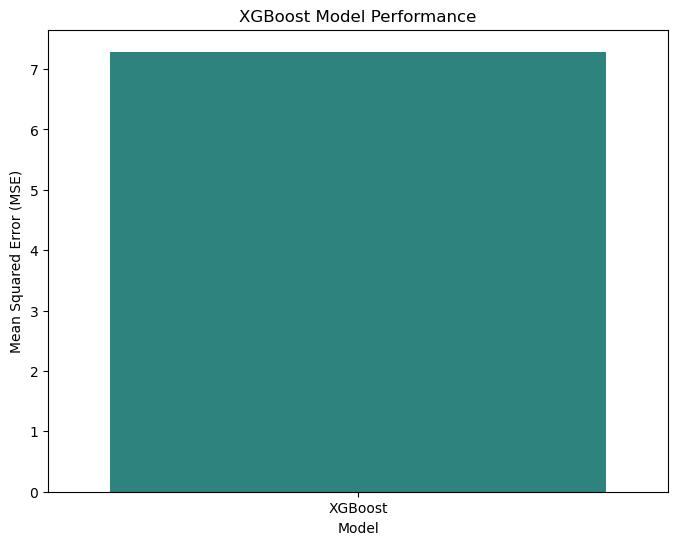

In [121]:
# XGBoost 모델의 MSE 값을 막대 그래프로 시각화

import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({
    'Model': ['XGBoost'],
    'MSE': [mse_xgb]
})

# 막대 그래프 생성
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MSE', data=df, hue='Model', palette='viridis', dodge=False, legend=False)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('XGBoost Model Performance')
plt.show()

모델의 MSE값(7.394726612206118)을 나타내는 하나의 막대그래프가 표시됐다. 
막대의 높이는 해당 모델의 MSE값을 나타낸다.

다음으로는 산점도 그래프를 사용하여 모델을 시각화해보자.

#### 📈 산점도 그래프
- 산점도 그래프는 두 변수 간의 관계를 시각적으로 표현하는 데 사용되는 그래프 유형이다. 
- 각 데이터 포인트를 하나의 점으로 표시하여, 한 변수의 값이 다른 변수와 어떻게 상관관계가 있는지를 나타낸다.
- 산점도는 데이터의 분포를 이해하고, 변수 간의 상관관계를 시각적으로 평가하는 데 매우 유용하다.

#### 산점도 그래프의 구성요소 
- 축 (Axes) 
    - x축: 한 변수를 나타낸다.
    - y축: 다른 변수를 나타낸다.

- 점 (Points)
    - 각 데이터 포인트는 두 변수의 값을 나타낸다.
    - 점의 위치는 두 변수의 값에 따라 결정된다.

#### 산점도 사용 예:
- 상관관계 분석: 두 변수 간의 상관관계를 시각적으로 평가할 수 있다.
- **이상값 탐지**: 데이터에서 이상값(outliers)을 쉽게 식별할 수 있다.
- 패턴 확인: 데이터의 전반적인 분포와 패턴을 파악할 수 있다.

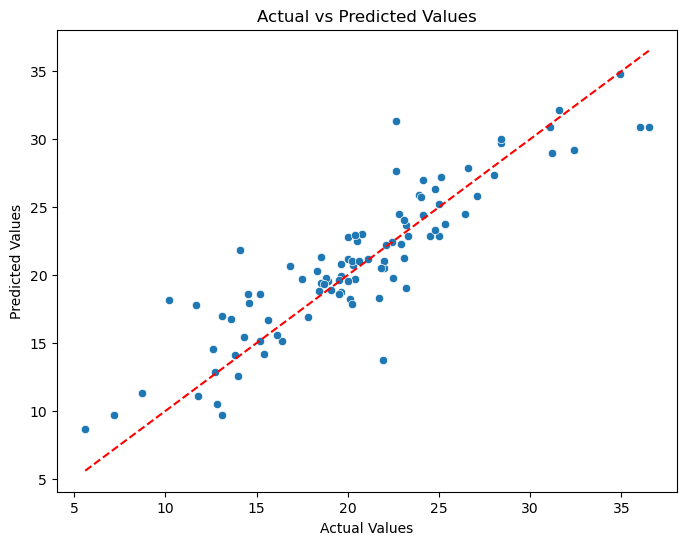

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# 실제값과 모델의 예측값을 데이터프레임으로 결합
df_pred_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})

# 산점도 그래프 생성

# 그래프 크기 설정 (가로8인치, 세로 6인치)
plt.figure(figsize=(8, 6)) 

# seaborn을 이용해 산점도 생성(x축에 실제값을 표시,y축에 예측값을 표시,데이터로 사용할 데이터프레임을 지정)
sns.scatterplot(x='Actual', y='Predicted', data=df_pred_actual) 

# 45도 대각선 참조선 추가(이 참조선은 이상적인 예측을 나타내며, 예측값이 실제값과 일치할 때 점들이 이 선위에 놓이게 된다.)
# 참조선을 그릴 때 최소값과 최대값을 사용하여 선을 그리게 된다.
plt.plot([df_pred_actual.min().min(), df_pred_actual.max().max()], [df_pred_actual.min().min(), df_pred_actual.max().max()], 'r--')

# x축 레이블 설정
plt.xlabel('Actual Values') 
# y축 레이블 설정
plt.ylabel('Predicted Values')
# 그래프 제목 설정
plt.title('Actual vs Predicted Values')

# 그래프를 화면에 표시
plt.show()


참조선(실제값과 예측값이 정확히 일치하는 이상선)을 기준으로 실제 예측값이 어떻게 분포해있는지 쉽게 볼 수 있다!

다음은 히스토그램을 사용하여 모델을 시각화해보자.

#### 히스토그램
- 히스토그램은 데이터의 분포를 시각적으로 표현하는 데 사용되는 그래프 유형이다. 
- 데이터를 구간(bin)으로 나누고, 각 구간에 속하는 데이터 포인트의 수를 세어 막대로 표현한다. 
- 히스토그램은 데이터가 어떻게 분포되어 있는지를 쉽게 파악할 수 있게 해준다.

#### 히스토그램의 구성요소
- 구간 (Bins): 데이터 범위를 여러 구간으로 나눈다. 각 구간은 일정한 간격을 가지며, **해당 구간에 속하는 데이터의 개수를 세어 막대로 표시**한다.
- 막대 (Bars): 각 막대는 **특정 구간 내 데이터 포인트의 수**를 나타낸다. 막대의 높이는 그 구간에 속하는 데이터의 개수를 나타내며, 이를 통해 **데이터의 빈도(frequency)를 파악**할 수 있다.


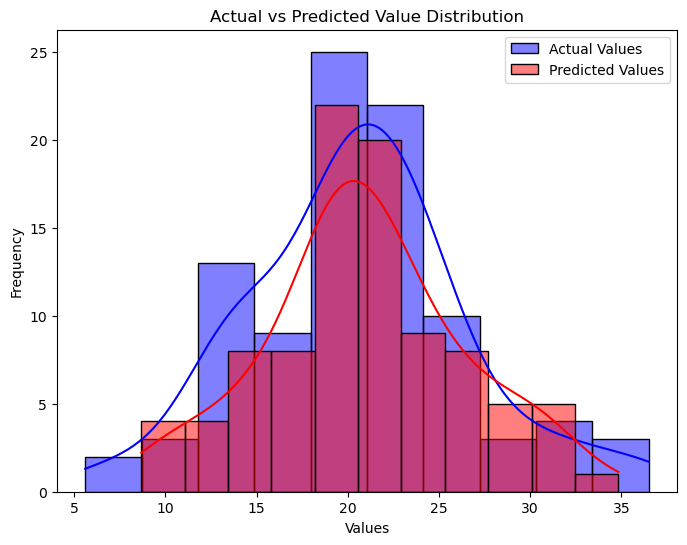

In [123]:
# 히스토그램 생성

# 그래프의 크기 설정
plt.figure(figsize=(8, 6))

# seaborn을 사용하여 히스토그램을 생성 (실제값을 파란막대로 설정, 범례에 표시될 레이블 설정, 커널 밀도 추정 곡선(Kernel Density Estimate 데이터의 분포를 부드럽게 보여줌)추가.)
sns.histplot(y_test, color="blue", label="Actual Values", kde=True)

# seaborn을 사용하여 히스토그램을 생성 (예측값을 빨간막대로 설정, 범례에 표시될 레이블을 설정, 커널 밀도 추정 곡선 추가) 
sns.histplot(y_pred_xgb, color="red", label="Predicted Values", kde=True)

# 축 레이블 및 제목 추가
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Value Distribution')

# 범례 추가 (범례를 추가하여 그래프에서 실제값과 예측값의 구분을 명확히 한다.)
plt.legend()

# 그래프 표시
plt.show()

실제값과 예측값의 분포를 히스토그램으로 시각적으로 비교할 수 있어 모델이 얼마나 잘 예측했는지, 예측값이 실제값과 얼마나 일치하는지를 평가할 수 있다!

✏️ 1번 과제를 통해 데이터를 모델에 학습시키기 전에 전처리하는 방법, 지도학습을 위한 다양한 머신러닝 모델을 활용하고 결과를 시각화하는 방법에 대해 학습할 수 있었다.